# Controlnet Canny

ControlNetは、条件を追加して拡散モデルを制御するためのニューラルネットワークアーキテクチャです。今回は、cannyエッジを抽出するControlNetの実行方法です．

- ドキュメント:https://huggingface.co/lllyasviel/sd-controlnet-canny

<a href="https://colab.research.google.com/github/fuyu-quant/data-science-wiki/blob/main/multimodal/text_to_image/latent_consistency_models.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install diffusers==0.23.0
!pip install accelerate==0.24.1
!pip install transformers==4.35.0
!pip install opencv-contrib-python==4.8.0.76
!pip3 install -U xformers --index-url https://download.pytorch.org/whl/cu118
#!pip install torch==2.1.0+cu118

In [2]:
import torch
print(torch.version.cuda)
# 実行が確認できたcudaのバージョン
# 11.8

11.8


In [3]:
import cv2
from PIL import Image
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch
import numpy as np
from diffusers.utils import load_image
import requests

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

### 画像の用意

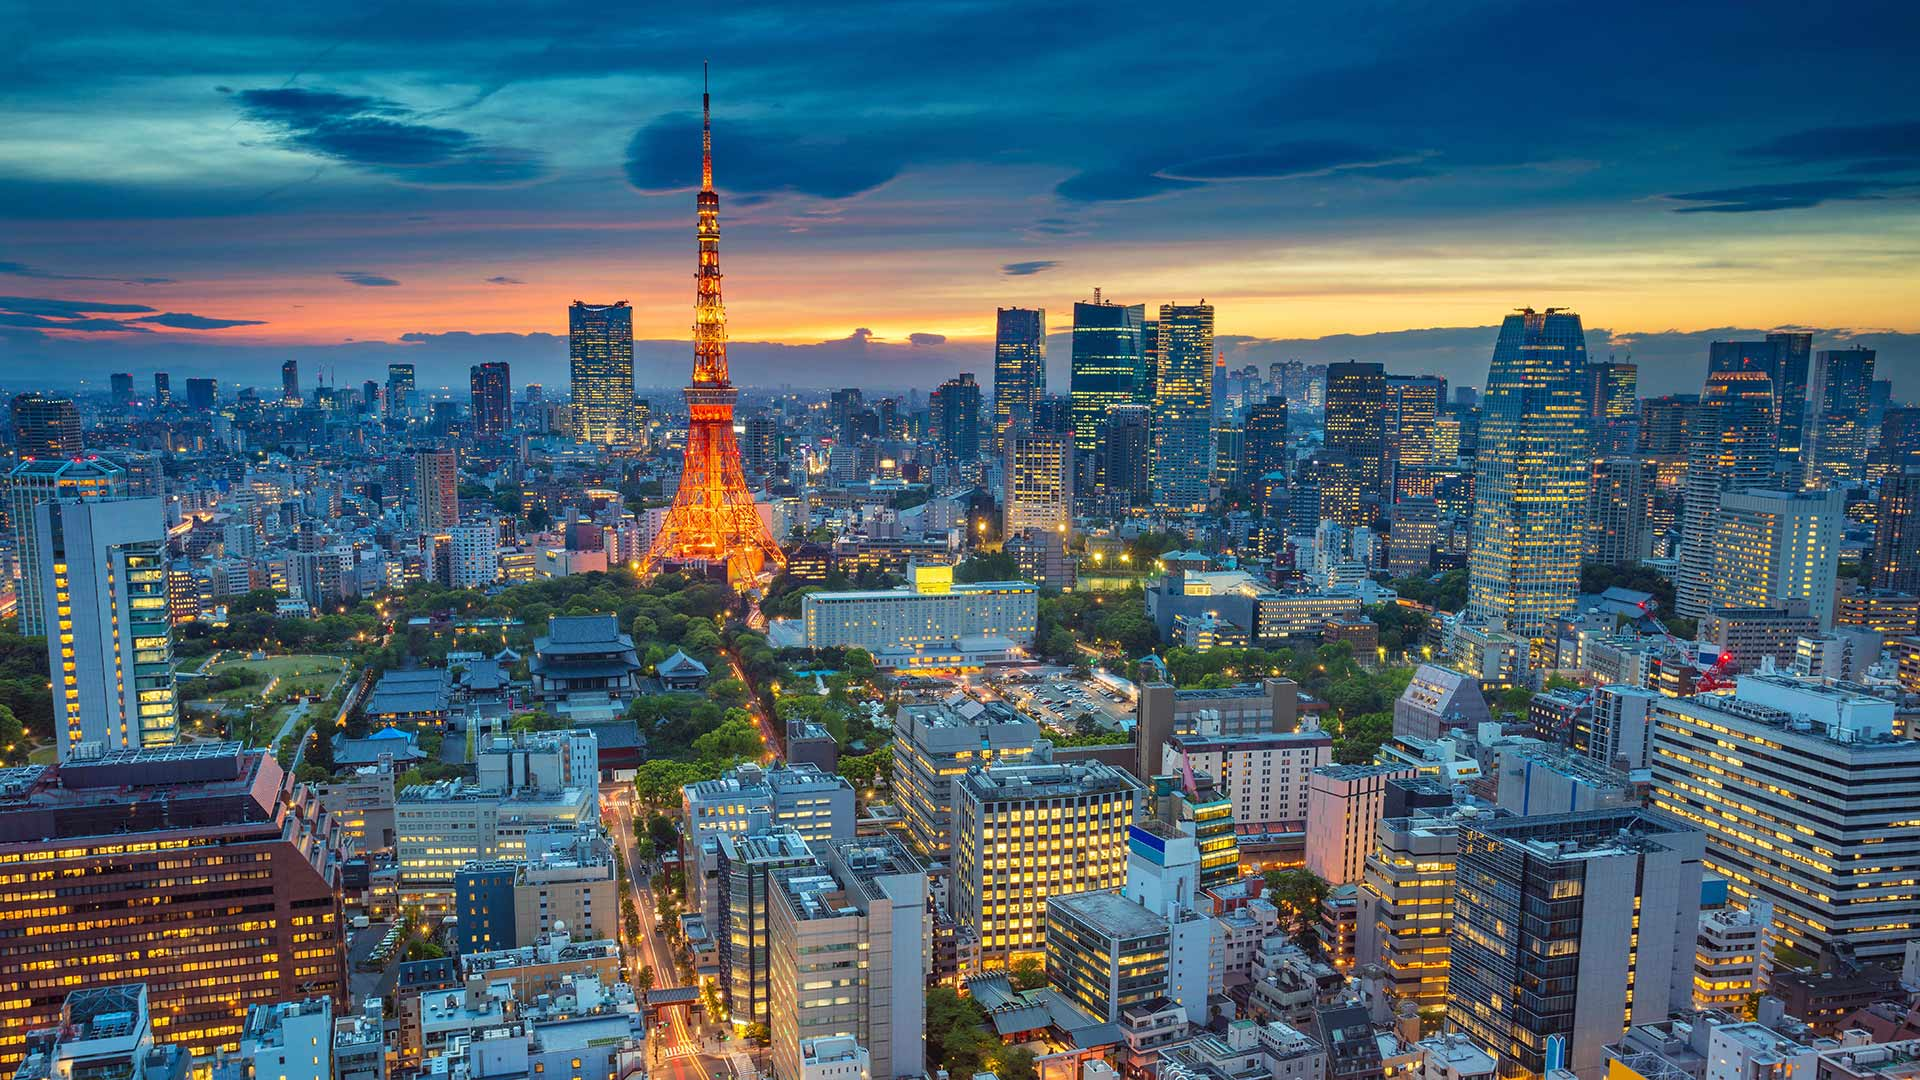

In [4]:
url = "https://img.peapix.com/e27fcf12e0664a5cb1c6b58c6b311d31.jpg?attachment&modal"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
image

In [5]:
# 画像の前処理
image = np.array(image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
image = Image.fromarray(image)

### Controlnet cannyのダウンロード

In [ ]:
controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)

pipe = StableDiffusionControlNetPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", controlnet=controlnet, safety_checker=None, torch_dtype=torch.float16)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

In [7]:
pipe.enable_xformers_memory_efficient_attention()
pipe.enable_model_cpu_offload()

image = pipe("tokyo", image, num_inference_steps=20).images[0]

image.save('tokyo.png')

  0%|          | 0/20 [00:00<?, ?it/s]

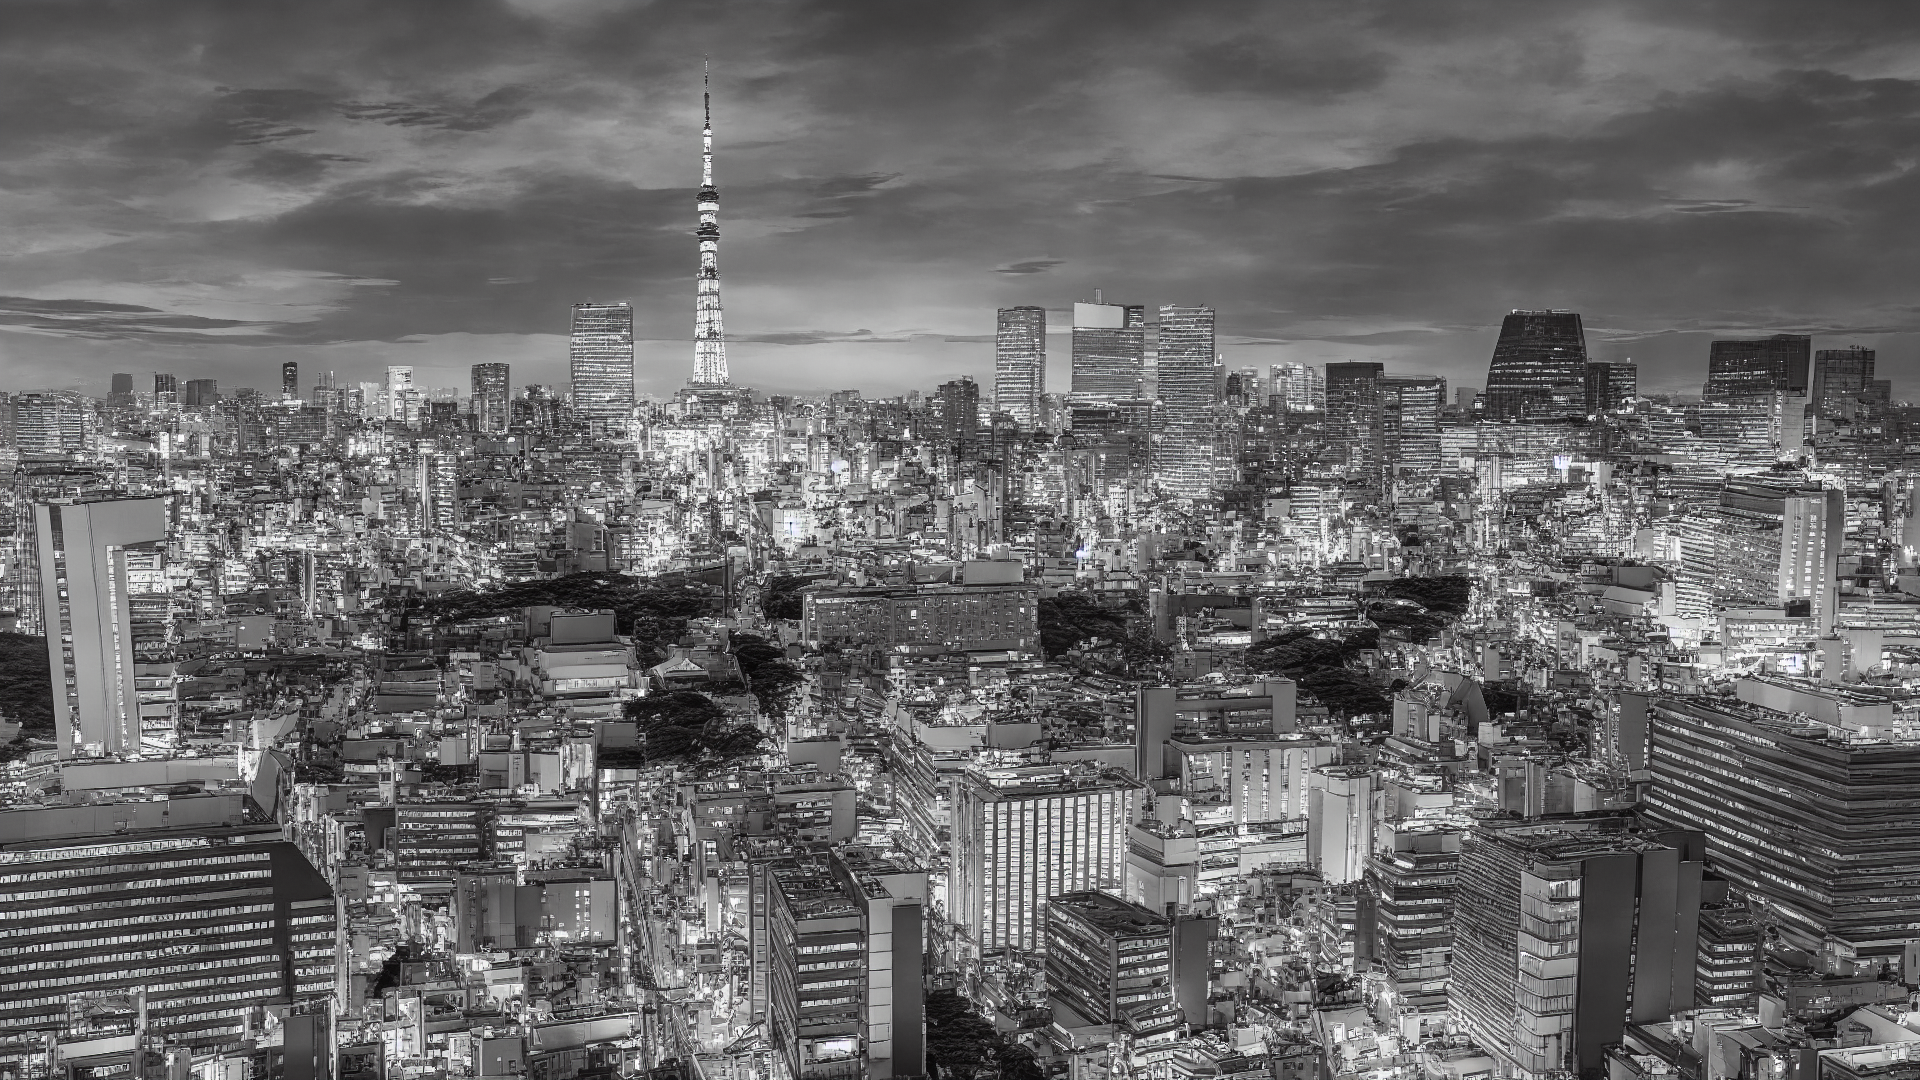

In [8]:
image